### Mini-batch KMeans

Algorym k-means jest wymagający obliczoniowo. Przy każdej aktualizacji centroidów trzeba liczyć odległości wszystkich punktów od każdego z centroidów. Przy dużej liczbie punktów staje się to poważnym problemem wydajnościowym. Jednym z rozwiązań w takiej sytuacji może być algorytm Mini-batch kmeans.

Załóżmy, że mamy bardzo dużo punktów i chcemy pogrupować je używając algorytmu kmeans. Zasosujmy algorytm mini-batch kmeans. Zasada działania algorytmu jest identyczna z dokładnością do tego, że za każdym razem odległości do centroidów liczone są tylko dla losowo wybranego zbioru próbek, a nie dla wszystkich punktów. W ten sposób możemy znacząco zmniejszyć liczbę obliczeń zachowując jednocześniej przyzwoitą dokładność rozwiązania. Oczywiście optymalizacja wydajnościowa dzieje się tutaj kosztem dokładności rozwiązania, ale utrata dokładności w większości przypadków jest niewielka. Zaniedbywalna względem korzyści wydajnościowych, które metoda przynosi.

#### Wygenerowanie losowego zbioru danych

In [3]:
import pandas as pd
from sklearn.datasets import make_blobs

# Generujemy 10 mln próbek
data = make_blobs(n_samples=10_000_000, centers=3, cluster_std=12.0, center_box=(-100.0, 100.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,-46.266802,-66.281907
1,-50.874436,86.067385
2,-8.144107,94.046882
3,-61.987833,-45.677828
4,-25.430450,97.105221


In [4]:
# import plotly.express as px

# Nie chcemy tego wyświetlać
# px.scatter(df, 'x1', 'x2', width=950, height=500, title='Dane')

#### Wyznaczenie klastrów KMeans - to będzie trwało za długo

In [5]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3, n_init=10)
# kmeans.fit(data)

#### Wyznaczenie klastrów MiniBatchKMeans

In [6]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(
    n_clusters=3, 
    random_state=0, 
    batch_size=1024, 
    n_init=10
)

In [7]:
kmeans.fit(data)

MiniBatchKMeans(n_clusters=3, n_init=10, random_state=0)

In [8]:
y_kmeans = kmeans.predict(data)
y_kmeans[:10]  # pierwsze 10 przypisań klastrów

array([1, 0, 0, 1, 0, 2, 0, 1, 0, 1])

In [9]:
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-46.266802,-66.281907,1
1,-50.874436,86.067385,0
2,-8.144107,94.046882,0
3,-61.987833,-45.677828,1
4,-25.430450,97.105221,0


#### Wizualizacja klastrów

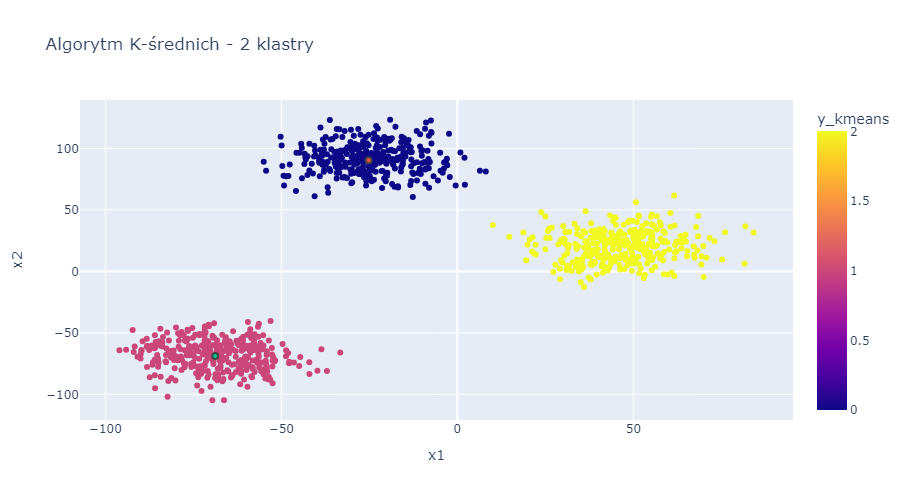

In [10]:
import plotly.graph_objects as go

centroid_1, centroid_2, centroid_3 = kmeans.cluster_centers_

# Wyświetlmy 1000 losowych próbek, bo 10 mln tu się nie wyrenderuje
fig = px.scatter(df.sample(1000), 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 2 klastry')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=2))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=2))
fig.update_layout(showlegend=False)

fig